## Assignment 2 - Convolutional Neural Networks

In this assignment, you will learn how to implement CNN which you've learnt in the module 2. As a part of this assignment, you will perform image classification using CNNs in PyTorch. The dataset which you'll be using in this assignment will be the standard CIFAR-10 dataset. One important thing you need to know about CIFAR-10 dataset is that the image dimensions in this dataset is 32 $\times$ 32, which is not as same as the MNIST dataset dimension which you might've used while learning FNNs. This notebook contains some pre-written code blocks and some empty cells which you need to fill to build a CNN and perform Image Classification. <br>

### Importing Libraries

In [4]:
# PyTorch Library
import torch
# PyTorch Neural Network
import torch.nn as nn
import torch.nn.functional as F
# Allows us to transform data
import torchvision.transforms as transforms
# Allows us to download the dataset
import torchvision.datasets as dsets
# Used to graph data and loss curves
import matplotlib.pyplot as plt
# Allows us to use arrays to manipulate and store data
import numpy as np
import random
import seaborn

In [5]:
def set_seed(seed=42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed(42)

### Load Dataset


In [6]:
### DO NOT CHANGE THIS CODE

composed = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
train = dsets.CIFAR10(root='./data', train=True, download=True, transform=composed)
test = dsets.CIFAR10(root='./data', train=False, download=True, transform=composed)

100%|██████████| 170498071/170498071 [00:01<00:00, 101368159.89it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
from torch.utils.data import random_split, DataLoader

train_ds, val_ds = random_split(train, [45000,5000])
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

### Training/Testing Split

Load Dataset<br>
Split the dataset into x_train, y_train, x_test, y_test

In [8]:
x_train, y_train = next(iter(train_loader))

# print(x_train[0])
x_test, y_test = next(iter(val_loader))



### Display Images and Label

Choose 16 images randomly and display them aling with their labels in a 4x4 grid



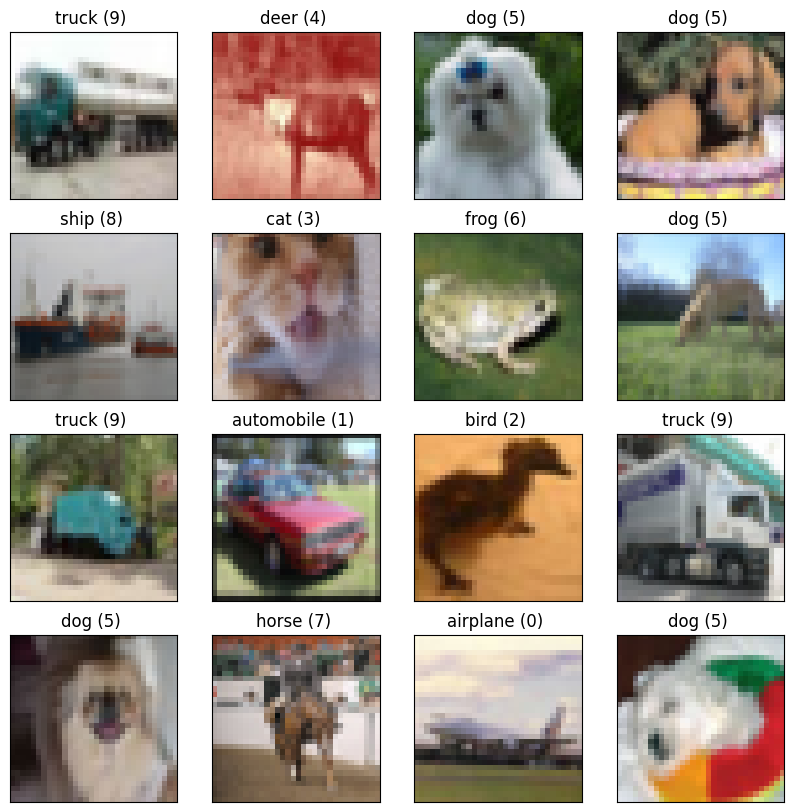

In [9]:
from torchvision.utils import make_grid

img_ind = random_numbers = random.sample(range(0, 64), 16)
img_arr = []
labels  = []
# mean = torch.tensor([0.5, 0.5, 0.5])
# std = torch.tensor([0.5, 0.5, 0.5])
for i in img_ind:
  img = x_train[i] * 0.5 + 0.5
  img_arr.append(img)
  labels.append(train.classes[y_train[i]] + " " + str(y_train[i])[6:] + " ")

fig=plt.figure(1,figsize=(10,10))
for i in range(len(img_arr)):
    ax=fig.add_subplot(4,4,i+1,xticks=[],yticks=[])
    plt.imshow(img_arr[i].permute(1, 2, 0))
    ax.set_title(labels[i])

### Modelling

Define a class which will form the architecture of your CNN model


In [10]:
class CNN(nn.Module):
    def __init__(self):
      super().__init__()
      self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, stride = 1, padding= 1)
      self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding= 1)
      self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 32, kernel_size = 3, stride = 1, padding= 1)
      self.pool  = nn.MaxPool2d(kernel_size = 2, stride = 2)
      self.fc1   = nn.Linear(in_features = 512, out_features = 128)
      self.fc2 = nn.Linear(in_features = 128, out_features = 32)
      self.fc3 = nn.Linear(in_features = 32, out_features = 10)


    def forward(self,x):
      #initial shape = 3*32*32  
      x = self.conv1(x)       # output shape = 32*32*32 
      x = F.relu(x)           # output shape = 32*32*32  
      x = self.pool(x)         # output shape = 32*16*16
      x = self.conv2(x)       # output shape = 32*16*16
      x = F.relu(x)           # output shape = 32*16*16
      x = self.pool(x)         # output shape = 32*8*8
      x = self.conv3(x)       # output shape = 32*8*8
      x = F.relu(x)           # output shape = 32*8*8
      x = self.pool(x)         # output shape = 32*4*4
      x = torch.flatten(x, 1)  
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = F.softmax(self.fc3(x), dim = 1)
      return x


### Training


Define the Convolutional Neural Network Classifier, Criterion function, Optimizer, and Train the Model

In [11]:
# define criterion function, optimizer, learning rate, number of epochs

# define 2 lists where you will store the cost and accuracy for each epoch


def train_model(num_epochs, train_loader, model):
  criterion = nn.CrossEntropyLoss()
  lr = 0.001
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
  epoch_loss_list = []
  epoch_acc_list = []
  for epoch in range(num_epochs):
    curr_loss = 0
    total = 0
    correct = 0
    for i, data in enumerate(train_loader, 0):
      x_train, y_train = data
      prediction  = model(x_train)
      max_val , prediction_val  = prediction.max(1)
      loss = criterion(prediction, y_train)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      curr_loss+= loss.item()
      total += y_train.size(0)
      correct += prediction_val.eq(y_train).sum().item()
    epoch_loss = curr_loss / len(train_loader)
    epoch_accuracy = 100.0 * correct / total
    epoch_loss_list.append(epoch_loss)
    epoch_acc_list.append(epoch_accuracy)
  return [epoch_loss_list, epoch_acc_list]  

## Actually training your model
- Create a model, initialize it. Define optimizer for the model as well as loss criterion (you can actually set the seed here again, just in case you did some ```rand``` calls above for testing your functions).
- Define an instance of the dataset class, wrap it in a dataloader.
- Call the train function and train your model!


In [12]:
## :)
model = CNN()
epochs = 40
lists = train_model(epochs, train_loader,model)

In [13]:
print(lists[0])
print(lists[1])

[2.1472686722197314, 2.056477149101821, 2.01301803863184, 1.981076180088249, 1.954993879253214, 1.9308262115175074, 1.9097671683200381, 1.8947439813478426, 1.8820904261347922, 1.8732571515508674, 1.865782120180401, 1.8511305635964328, 1.8486537154425273, 1.8365241018208591, 1.8235100934451276, 1.7843045634640888, 1.7697658056223935, 1.7657708104022525, 1.7517224817790769, 1.743245113810355, 1.7396298972043125, 1.736513540995392, 1.7238335377452048, 1.7259274643253197, 1.7201134210283107, 1.7136342476376079, 1.713423502208157, 1.7117569265379147, 1.7084070125764066, 1.7078899239951915, 1.703172355043617, 1.699562444266948, 1.6977901033718477, 1.694631413641301, 1.6962377925149419, 1.6913586258888245, 1.688611383803866, 1.6825596248223023, 1.6884573105384002, 1.6866237407719546]
[30.362222222222222, 39.99333333333333, 44.495555555555555, 47.684444444444445, 50.31333333333333, 52.83555555555556, 55.0, 56.45333333333333, 57.61333333333334, 58.73555555555556, 59.38444444444445, 60.873333333

### Analyze Results

Plot the Loss and Accuracy vs Epoch graph

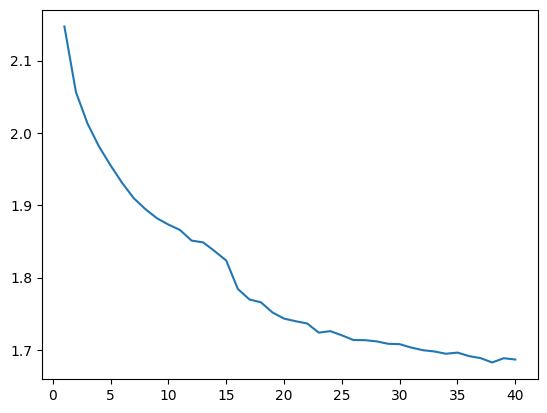

In [16]:
## :)
x = range(1,41)
plt.plot(x, lists[0])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

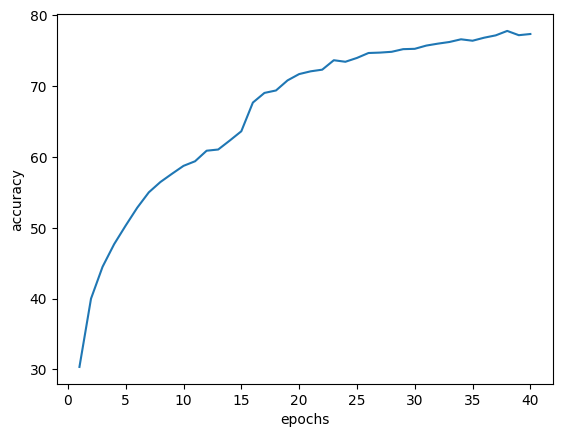

In [17]:
x = range(1,41)
plt.plot(x, lists[1])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

### Submission

Create another folder named **Week 2** in your Github Repo.<br>
Save the trained model in a file named ```final_model.pt```. When you are done with the assignment, commit the updated notebook, and the ```final_model.pt``` model-weights file to Github Repo.

In [19]:
torch.save(model.state_dict(), "final_model.pt")

### Load the model

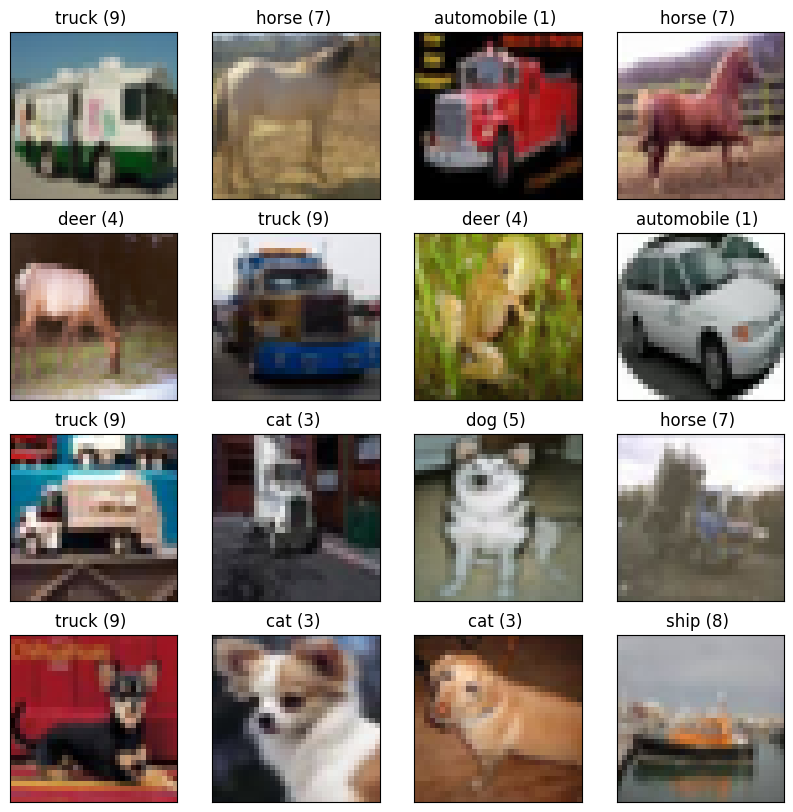

In [20]:
## Load the saved model and Make prediction on few images and display them the same way as before
model.load_state_dict(torch.load("final_model.pt"))
# test_loader = DataLoader(test, batch_size=64, shuffle=True)
total = 0
correct = 0
x_test, y_test = next(iter(val_loader))
prediction  = model(x_test)
max_val , prediction_val  = prediction.max(1)


img_ind = random_numbers = random.sample(range(0, 64), 16)
img_arr = []
labels  = []
for i in img_ind:
  img = x_test[i] * 0.5 + 0.5
  img_arr.append(img)
  labels.append(train.classes[prediction_val[i]] + " " + str(prediction_val[i])[6:] + " ")

fig=plt.figure(1,figsize=(10,10))
for i in range(len(img_arr)):
    ax=fig.add_subplot(4,4,i+1,xticks=[],yticks=[])
    plt.imshow(img_arr[i].permute(1, 2, 0))
    ax.set_title(labels[i])

